In [1]:
from zipline import run_algorithm
from zipline.api import (
    order_target_percent,
    symbol,
    set_commission,
    set_benchmark,
    order,
    record
)
from zipline.finance.commission import PerTrade
import pandas as pd
import pyfolio as pf
from pyfolio.utils import extract_rets_pos_txn_from_zipline
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

/home/shell007/anaconda3/envs/fa/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/shell007/anaconda3/envs/fa/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/shell007/anaconda3/envs/fa/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/shell007/anaconda3/envs/fa/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
%matplotlib inline 
%load_ext zipline

In [3]:
stock = "BTC"


def initialize(context):
    context.stock = symbol("BTC")
    context.has_ordered = False
    context.rolling_window = 90
    set_commission(PerTrade(cost=5))
    set_benchmark(False)


def handle_data(context, data):
    if not context.has_ordered:
        order(symbol(stock), 10000)
        context.has_ordered = True


def analyze(context, perf):
    returns, positions, transactions = extract_rets_pos_txn_from_zipline(perf)


In [4]:
# def initialize(context):
#     context.stock = 'BTC'
#     context.rolling_window = 90
#     set_commission(PerTrade(cost=5))
#     set_benchmark(False) analyze = analyze, handle_d

# def handle_data(context, data):
#     price_hist = data.history(context.stock, 'close', context.rolling_window, '1d')
#     order_target_percent(context.stock, 1.0 if price_hist[-1] > price_hist.mean() else 0)

# def analyze(context, perf):
#     returns, positions, transactions = extract_rets_pos_txn_from_zipline(perf)

start_date = pd.to_datetime('2021-8-20', utc= True)
end_date = pd.to_datetime('2022-8-20', utc= True)
print(start_date)    

2021-08-20 00:00:00+00:00


In [5]:
results = run_algorithm(start=start_date, end=end_date, initialize=initialize, capital_base=10000, handle_data=handle_data, analyze=analyze, data_frequency='daily', bundle='cryptocompare_daily')

In [6]:
results.tail()

,period_open,period_close,returns,pnl,capital_used,net_leverage,starting_cash,orders,ending_value,starting_value,...,treasury_period_return,algo_volatility,period_label,trading_days,benchmark_period_return,benchmark_volatility,alpha,beta,sharpe,sortino
2022-08-15 00:00:00+00:00,2022-08-15 13:31:00+00:00,2022-08-15 20:00:00+00:00,-0.014598,3703500.0,0.0,-0.972562,-4.931336e+08,[],243137100.0,239433600.0,...,0.0,125.529633,2022-08,249,None,1.282736,-1.0,-3.876361,-1.615671,-1.617401
2022-08-16 00:00:00+00:00,2022-08-16 13:31:00+00:00,2022-08-16 20:00:00+00:00,0.008481,-2120200.0,0.0,-0.955974,-4.931336e+08,[],241016900.0,243137100.0,...,0.0,125.279973,2022-08,250,None,1.280137,-1.0,-3.876765,-1.612347,-1.614094
2022-08-17 00:00:00+00:00,2022-08-17 13:31:00+00:00,2022-08-17 20:00:00+00:00,0.009640,-2430500.0,0.0,-0.937297,-4.931336e+08,[],238586400.0,241016900.0,...,0.0,125.031804,2022-08,251,None,1.277840,-1.0,-3.863053,-1.609034,-1.610798
2022-08-18 00:00:00+00:00,2022-08-18 13:31:00+00:00,2022-08-18 20:00:00+00:00,0.020452,-5206100.0,0.0,-0.898469,-4.931336e+08,[],233380300.0,238586400.0,...,0.0,124.785174,2022-08,252,None,1.278185,-1.0,-3.883955,-1.605652,-1.607435
2022-08-19 00:00:00+00:00,2022-08-19 13:31:00+00:00,2022-08-19 20:00:00+00:00,0.005256,-1365200.0,0.0,-0.888543,-4.931336e+08,[],232015100.0,233380300.0,...,0.0,124.539900,2022-08,253,None,1.276630,-1.0,-3.899884,-1.602413,-1.604213


In [7]:
returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)

#### Drawdowns

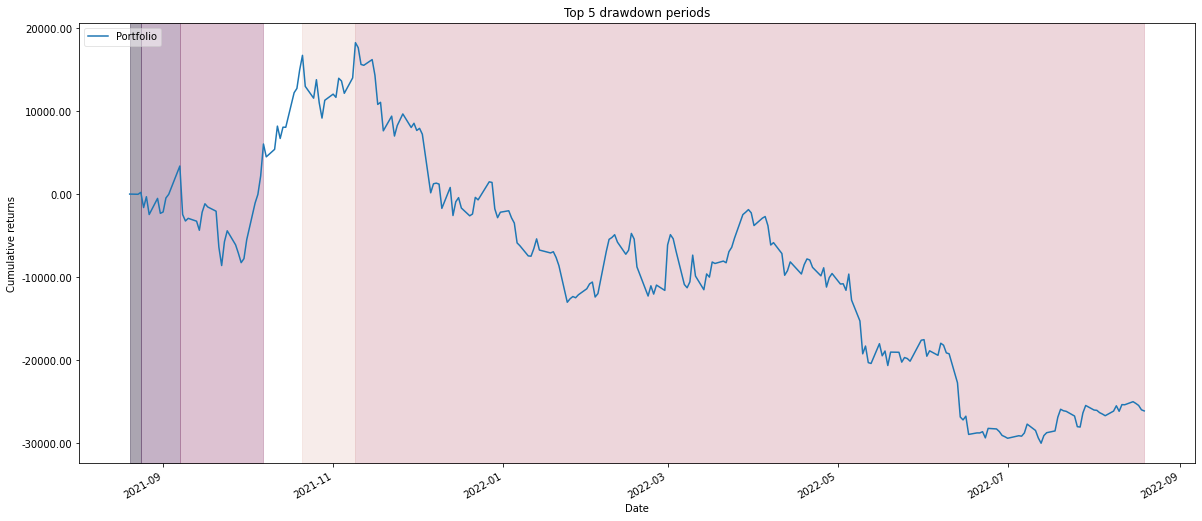

In [8]:
plt.figure(figsize=(20, 9))
pf.plot_drawdown_periods(returns, top=5).set_xlabel('Date')
plt.show()

#### Full Tear Sheet

In [74]:
# pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, round_trips=True)

## Simple Moving Average Strategy

In [36]:
def initialize(context):
    context.stock = symbol('BTC')
    context.rolling_window = 2
    set_commission(PerTrade(cost=5))
    context.i = 0


def handle_data(context, data):
    context.i += 1
    if context.i < context.rolling_window:
        return
    price_hist = data.history(context.stock, 'price',context.rolling_window, '1d')
    rolling_mean_short_term = price_hist.rolling(window= context.rolling_window//2, center= False).mean()
    rolling_mean_long_term = price_hist.rolling(window= context.rolling_window, center= False).mean()

    if rolling_mean_short_term[-1] > rolling_mean_long_term[-1]:
        order(context.stock, 100.0)     
    elif rolling_mean_short_term[-1] < rolling_mean_long_term[-1]:
        order(context.stock, 0.0)     


start_date = pd.to_datetime('2022-1-20', utc= True)
end_date = pd.to_datetime('2022-8-20', utc= True)
# print(start_date)    
results = run_algorithm(start=start_date, end=end_date, initialize=initialize, capital_base=10000, handle_data=handle_data, data_frequency='daily', bundle='cryptocompare_daily')
returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)
 

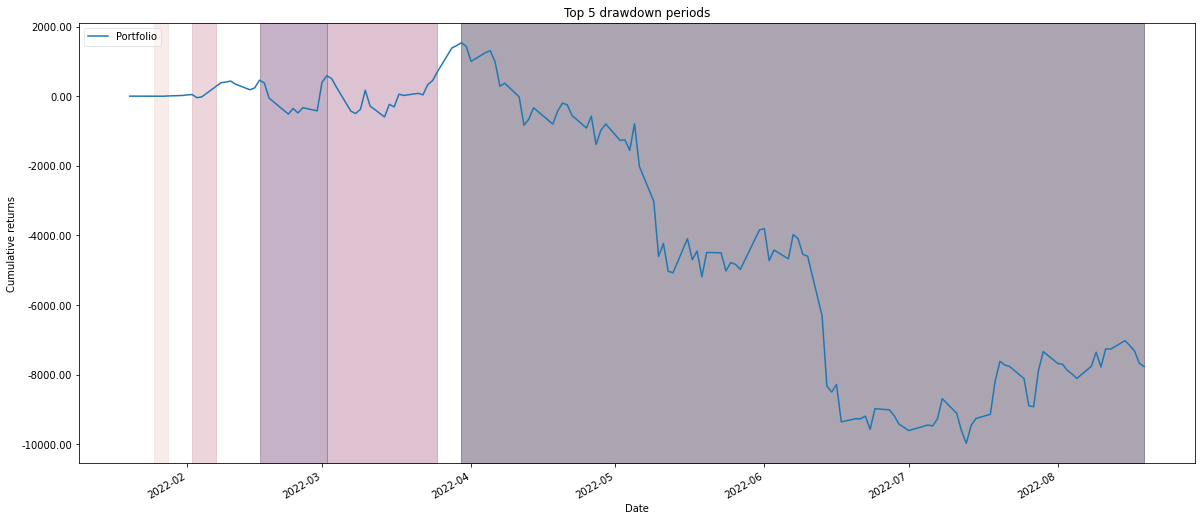

In [41]:
plt.figure(figsize=(20, 9))
pf.plot_drawdown_periods(returns, top=5).set_xlabel('Date')
plt.show()

In [42]:
results.describe()

,long_exposure,short_exposure,gross_leverage,ending_exposure,net_leverage,starting_value,ending_value,starting_cash,ending_cash,portfolio_value,...,benchmark_volatility,algo_volatility,sharpe,sortino,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,algorithm_period_return
count,1.480000e+02,148.0,148.000000,1.480000e+02,148.000000,1.480000e+02,1.480000e+02,1.480000e+02,1.480000e+02,1.480000e+02,...,147.0,147.000000,144.000000,144.000000,148.000000,148.000000,148.0,148.0,148.000000,148.000000
mean,1.065109e+08,0.0,-3.114817,1.065109e+08,-3.114817,1.054605e+08,1.065109e+08,-1.403060e+08,-1.418809e+08,-3.537005e+07,...,0.0,63.989615,-0.753757,-0.091507,-4.082081,441.637042,0.0,0.0,74.500000,-3538.004560
std,4.326506e+07,0.0,106.967489,4.326506e+07,106.967489,4.395038e+07,4.326506e+07,7.078491e+07,7.023261e+07,3.864249e+07,...,0.0,16.272248,2.372106,2.941998,2.447042,73.856110,0.0,0.0,42.868014,3864.249334
min,0.000000e+00,0.0,-880.846440,0.000000e+00,-880.846440,0.000000e+00,0.000000e+00,-2.330784e+08,-2.330784e+08,-9.966901e+07,...,0.0,0.000000,-7.660914,-7.337697,-7.491794,0.000000,0.0,0.0,1.000000,-9967.901163
25%,7.550558e+07,0.0,-3.801139,7.550558e+07,-3.801139,7.530282e+07,7.550558e+07,-2.015385e+08,-2.015385e+08,-7.701913e+07,...,0.0,57.806586,-2.854063,-3.141330,-7.230821,453.904738,0.0,0.0,37.750000,-7702.912853
50%,1.215665e+08,0.0,-1.842051,1.215665e+08,-1.842051,1.204529e+08,1.215665e+08,-1.626855e+08,-1.645138e+08,-1.785554e+07,...,0.0,64.323824,0.809975,1.867287,-2.213621,453.904738,0.0,0.0,74.500000,-1786.554317
75%,1.405784e+08,0.0,0.000000,1.405784e+08,0.000000,1.401427e+08,1.405784e+08,-7.776746e+07,-7.776746e+07,1.000000e+04,...,0.0,73.732264,0.907365,2.093765,-2.114503,453.904738,0.0,0.0,111.250000,0.000000
max,1.614813e+08,0.0,453.904738,1.614813e+08,453.904738,1.614813e+08,1.614813e+08,1.000000e+04,1.000000e+04,1.535308e+07,...,0.0,92.649493,1.011876,2.337394,0.000000,453.904738,0.0,0.0,148.000000,1534.307563


<AxesSubplot:>

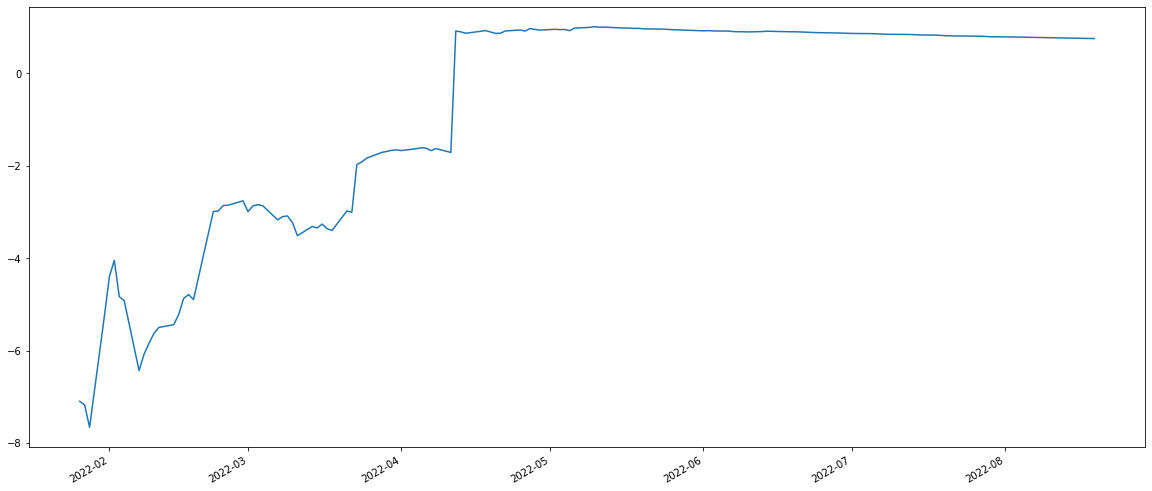

In [50]:
results.sharpe.plot(figsize=(20, 9))

## Exponentially-Weighted Moving Average Strategy

In [51]:
def initialize(context):
    context.stock = symbol('BTC')
    context.rolling_window = 30

def handle_data(context, data):
    price_hist = data.history(context.stock, 'close', context.rolling_window, '1d')
    
    rolling_mean_short_term = price_hist.ewm(span = 5, adjust = True, ignore_na = True).mean()
    rolling_mean_long_term = price_hist.ewm(span= 30, adjust= True, ignore_na= True).mean()
    
    if rolling_mean_short_term[-1] > rolling_mean_long_term[-1]:
        order(context.stock, 100.0)
    elif rolling_mean_short_term[-1] < rolling_mean_long_term[-1]:
        order(context.stock, 0.0)
        
start_date = pd.to_datetime('2022-1-20', utc= True)
end_date = pd.to_datetime('2022-8-20', utc= True)
# print(start_date)    
results = run_algorithm(start=start_date, end=end_date, initialize=initialize, capital_base=10000, handle_data=handle_data, data_frequency='daily', bundle='cryptocompare_daily')
returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)

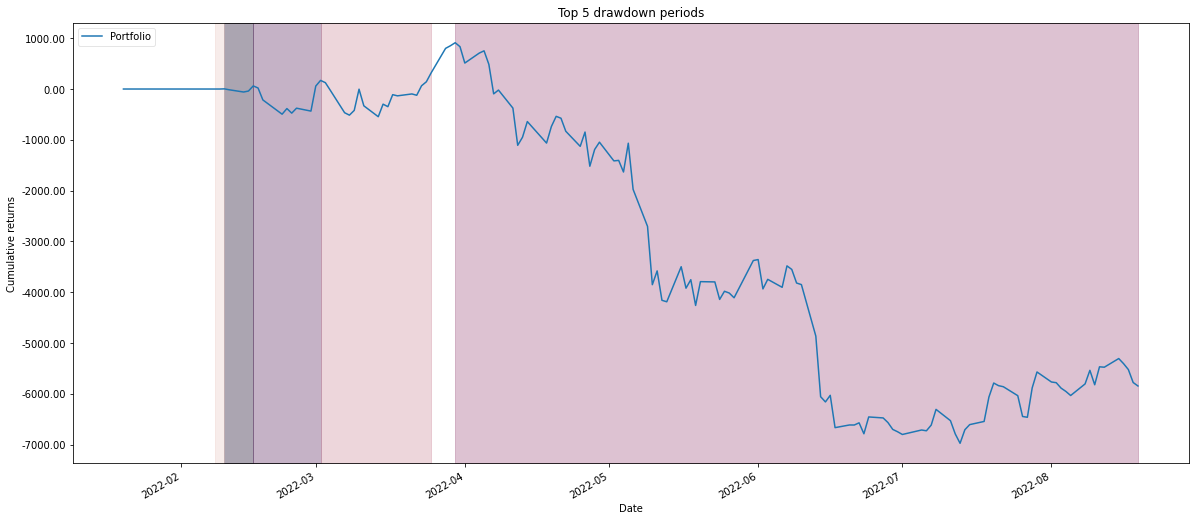

In [54]:
plt.figure(figsize=(20, 9))
pf.plot_drawdown_periods(returns, top=5).set_xlabel('Date')
plt.show()

<AxesSubplot:>

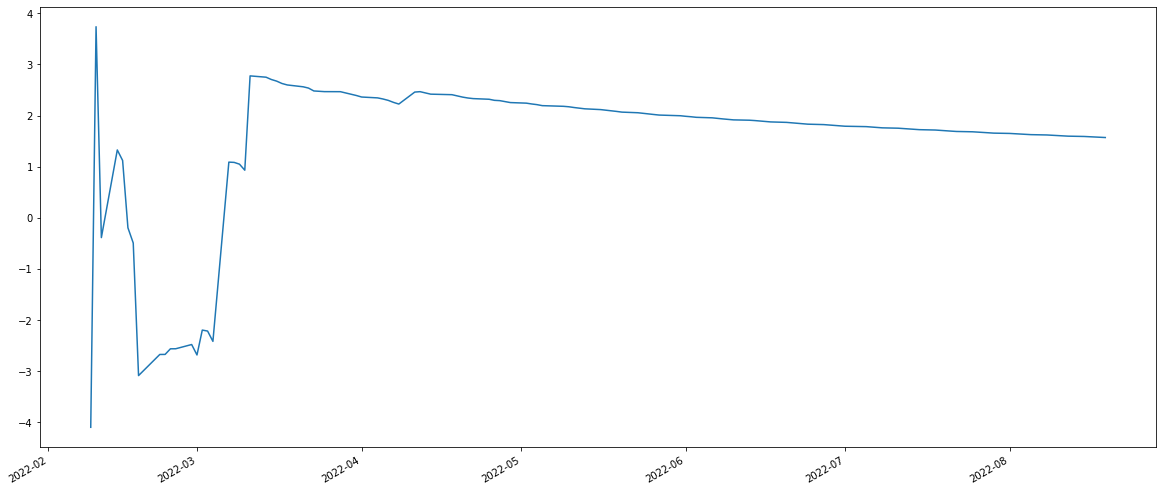

In [55]:
results.sharpe.plot(figsize=(20, 9))

## MACD Crossover Strategy

In [57]:
from stockstats import StockDataFrame as sdf

In [58]:
def initialize(context):
    context.stock(symbol('BTC'))
    context.rolling_window = 20

def handle_data(context, data):
    price_hist = data.history(context.stock, ["open", "high", "low","close"], context.rolling_window, "1d")             
    stock= sdf.retype(price_hist)   
    signal= stock['macds']
    macd = stock['macd'] 
    
    if macd[-1] > signal[-1] and macd[-2] <= signal[-2]:
        order(context.stock, 100.0)
    elif macd[-1] < signal[-1] and macd[-2] >= signal[-2]:
        order(context.stock, 0.0)


start_date = pd.to_datetime('2022-1-20', utc= True)
end_date = pd.to_datetime('2022-8-20', utc= True)
# print(start_date)    
results = run_algorithm(start=start_date, end=end_date, initialize=initialize, capital_base=10000, handle_data=handle_data, data_frequency='daily', bundle='cryptocompare_daily')
returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)

AttributeError: 'TradingAlgorithm' object has no attribute 'stock'

In [ ]:
plt.figure(figsize=(20, 9))
pf.plot_drawdown_periods(returns, top=5).set_xlabel('Date')
plt.show()